In kalmann filter , we basically find out the true values of parameter. As the true value depends on measured value and process value , the true value lie btw them.
resources :
1)Michel van 
Bizen Yt channel =https://youtube.com/playlist?list=PLX2gX-ftPVXU3oUFNATxGXY90AULiqnWT

2)kalmanntutorial =https://www.kalmanfilter.net/default.aspx

3) book given in question

in this notebook , i have consider acceleration as vf-v1/t , i know this not true but it is valid assumption as i dont know the function of v (from graph , i could have use slop) but it became difficult to code, morever v2=v+at,v2=v1+(v2-v1) and thus it becomes too close ,now by doing so my process and measurement matrix become too close as a result my prediction has became too close to give(missing values by 3 or 4 unit in position and .2 to .4 in velocity) as a result my graph overlap 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_table('kalmann.txt',sep=',')
df=df.reset_index()
df.columns=['Px','Py','Vx','Vy']
df.head()
df['t']=df.index+1
df.head()




,Px,Py,Vx,Vy,t
0,368.189316,6.596611,-0.099070,6.361599,1
1,369.507932,12.687990,-0.298079,6.396538,2
2,377.056300,19.793198,-0.498540,6.339847,3
3,365.687485,25.654750,-0.695548,6.348781,4
4,370.055447,32.080984,-0.900690,6.373027,5


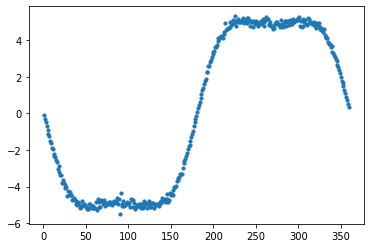

In [3]:
plt.scatter(df['t'],df['Vx'],s=10)

  

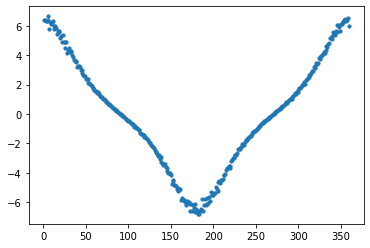

In [4]:
plt.scatter(df['t'],df['Vy'],s=10)

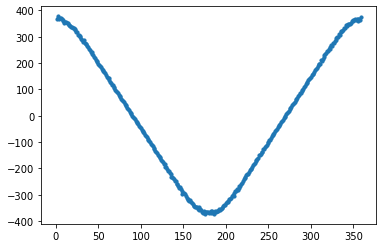

In [5]:
plt.scatter(df['t'],df['Px'],s=10)

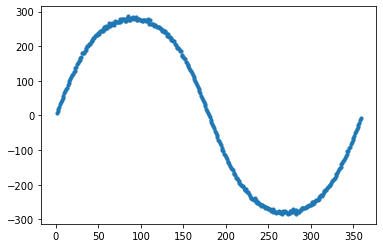

In [6]:
plt.scatter(df['t'],df['Py'],s=10)

In [7]:
#process error
#i have taken process error of position higher than error of velocities as velocities are small and can be affected with large eror
#nevertheless it depends on accuracy of sensors whose data isnt given

P=np.array([[30,0,0,0],[0,30,0,0],[0,0,.3,0],[0,0,0,.3]])
print(P)

[[30.   0.   0.   0. ]
 [ 0.  30.   0.   0. ]
 [ 0.   0.   0.3  0. ]
 [ 0.   0.   0.   0.3]]


In [8]:
A=np.array([[1,0,1,0],[0,1,0,1],[0,0,1,0],[0,0,0,1]])
A

array([[1, 0, 1, 0],
       [0, 1, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 0, 1]])

In [9]:
B=np.array([[0.5,0],[0,0.5],[1,0],[0,1]])
B

array([[0.5, 0. ],
       [0. , 0.5],
       [1. , 0. ],
       [0. , 1. ]])

In [10]:
df['ax']=df['Vx']

for i in range(1,359):
  df.loc[i,'ax']=df.loc[i,'Vx']-df.loc[i-1,'Vx'] 
df.tail() 

,Px,Py,Vx,Vy,t,ax
354,360.243049,-33.560146,1.084415,6.423989,355,-0.161965
355,367.249476,-26.262005,0.902986,6.327364,356,-0.181429
356,368.359065,-20.579041,0.732473,6.402460,357,-0.170513
357,362.376060,-14.273294,0.530702,6.544884,358,-0.201771
358,372.546709,-7.564212,0.325604,6.003953,359,-0.205098


In [11]:
df['ay']=df['Vy']

for i in range(1,359):
  df.loc[i,'ay']=df.loc[i,'Vy']-df.loc[i-1,'Vy'] 
df.tail() 

,Px,Py,Vx,Vy,t,ax,ay
354,360.243049,-33.560146,1.084415,6.423989,355,-0.161965,0.053656
355,367.249476,-26.262005,0.902986,6.327364,356,-0.181429,-0.096624
356,368.359065,-20.579041,0.732473,6.402460,357,-0.170513,0.075096
357,362.376060,-14.273294,0.530702,6.544884,358,-0.201771,0.142424
358,372.546709,-7.564212,0.325604,6.003953,359,-0.205098,-0.540932


In [12]:
R=np.array([[40,0,0,0],[0,40,0,0],[0,0,0.5,0],[0,0,0,0.5]])

In [13]:
H=np.array([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]])
#measuring matix, as we r measuring all the things it is a unity matrix

In [14]:
#i am not taking q and w matrix as i have already approximated acceleration and q matrix is proexess noice cov matrix which i have already approximated in p

In [15]:
pred=df.copy()
del pred['ax']
del pred['ay']
pred['p1']=pred.index
pred['p2']=pred.index
pred['p3']=pred.index
pred['p4']=pred.index
pred.loc[0,'p1']=30
pred.loc[0,'p2']=30
pred.loc[0,'p3']=.3
pred.loc[0,'p4']=.3
pred.tail()

,Px,Py,Vx,Vy,t,p1,p2,p3,p4
354,360.243049,-33.560146,1.084415,6.423989,355,354,354,354.0,354.0
355,367.249476,-26.262005,0.902986,6.327364,356,355,355,355.0,355.0
356,368.359065,-20.579041,0.732473,6.402460,357,356,356,356.0,356.0
357,362.376060,-14.273294,0.530702,6.544884,358,357,357,357.0,357.0
358,372.546709,-7.564212,0.325604,6.003953,359,358,358,358.0,358.0


formula for calculation

---


1)Xkp=A*xk-1+b*uk+wk(0)

---


2)Pkp=APK-1*A^T+Qk

---


3)K=Pkp*H/(HPKP*H^T+R)

---


4)Xpred=Xkp+K[xk-h*xkp)

---


5)PK=(1-K*h)*P


In [16]:

for i in range(1,359):
  Xk=np.array([[df.loc[i,'Px']],[df.loc[i,'Py']],[df.loc[i,'Vx']],[df.loc[i,'Vy']]])
  Xj=np.array([[pred.loc[i-1,'Px']],[pred.loc[i-1,'Py']],[pred.loc[i-1,'Vx']],[pred.loc[i-1,'Vy']]])
  uk=np.array([[df.loc[i,'ax']],[df.loc[i,'ay']]])
  Xkp=A@Xj+B@uk
  Pj=np.array([[pred.loc[i-1,'p1'],0,0,0],[0,pred.loc[i-1,'p2'],0,0],[0,0,pred.loc[i-1,'p3'],0],[0,0,0,pred.loc[i-1,'p4']]])
  Pk=A@Pj@A.transpose()
  S=H@Pk@H.transpose()+R
  K=Pk@H@np.linalg.pinv(S)
  Ab=Xkp+K@(Xk-H@Xkp)
  pred.loc[i,'Px']=Ab[0]
  pred.loc[i,'Py']=Ab[1]
  pred.loc[i,'Vx']=Ab[2]
  pred.loc[i,'Vy']=Ab[3]
  Pk=(np.identity(4)-K@H)@Pk
  pred.loc[i,'p1']=Pk[0,0]
  pred.loc[i,'p2']=Pk[1,1]
  pred.loc[i,'p3']=Pk[2,2]
  pred.loc[i,'p4']=Pk[3,3]
pred.tail()

  

  


,Px,Py,Vx,Vy,t,p1,p2,p3,p4
354,368.599132,-37.192308,1.095157,6.430055,355,0.269656,0.269656,0.001389,0.001389
355,369.587702,-30.779967,0.913618,6.333571,356,0.269217,0.269217,0.001385,0.001385
356,370.402212,-24.383131,0.743005,6.408781,357,0.268780,0.268780,0.001381,0.001381
357,370.986150,-17.878804,0.540908,6.551311,358,0.268345,0.268345,0.001377,0.001377
358,371.431998,-11.570959,0.335821,6.010500,359,0.267912,0.267912,0.001373,0.001373


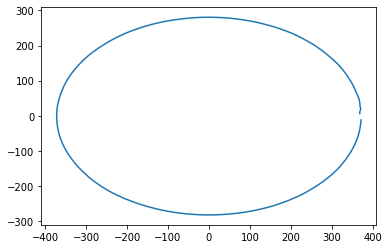

In [17]:

plt.plot(pred.Px,pred.Py)



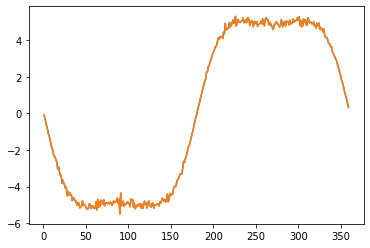

In [ ]:

plt.plot(pred.t,pred.Vx)
plt.plot(df.t,df.Vx)


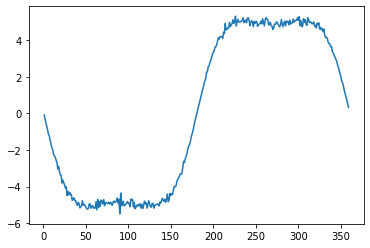

In [ ]:
plt.plot(df.t,df.Vx)

In [ ]:
df.head()


,Px,Py,Vx,Vy,t,ax,ay
0,368.189316,6.596611,-0.099070,6.361599,1,-0.099070,6.361599
1,369.507932,12.687990,-0.298079,6.396538,2,-0.199009,0.034939
2,377.056300,19.793198,-0.498540,6.339847,3,-0.200461,-0.056691
3,365.687485,25.654750,-0.695548,6.348781,4,-0.197008,0.008934
4,370.055447,32.080984,-0.900690,6.373027,5,-0.205141,0.024246


In [ ]:
pred.to_csv('kalwitha.csv')

In [ ]:
q1=df['Px'].std()
q2=df['Py'].std()
q3=df['Vx'].std()
q4=df['Vy'].std()
q5=0
q6=0
q7=0
q8=0
q9=0
q10=0
q11=0
for i in range(0,359):
  q5=q5+(df.Px.mean()-df.loc[i,'Px'])*(df.Py.mean()-df.loc[i,'Py'])/358
  q6=q6+(df.Px.mean()-df.loc[i,'Px'])*(df.Vx.mean()-df.loc[i,'Vx'])/358
  q7=q7+(df.Px.mean()-df.loc[i,'Px'])*(df.Vy.mean()-df.loc[i,'Vy'])/358
  q8=q8+(df.Vx.mean()-df.loc[i,'Vx'])*(df.Py.mean()-df.loc[i,'Py'])/358
  q9=q9+(df.Vy.mean()-df.loc[i,'Vy'])*(df.Py.mean()-df.loc[i,'Py'])/358
  q10=q10+(df.Vx.mean()-df.loc[i,'Vx'])*(df.Vy.mean()-df.loc[i,'Vy'])/359
  q11=q11+(df.Vx.mean()-df.loc[i,'Vx'])*(df.Vx.mean()-df.loc[i,'Vx'])/358

print(q11)
print(q3*q3)
N1=np.array([[q1*q1,q1*q2,q1*q3,q1*q4],[q1*q2,q2*q2,q2*q3,q2*q4],[q1*q3,q2*q3,q3*q3,q4*q3],[q4*q1,q4*q2,q4*q3,q4*q4]])
print(N1)


18.87611099367906
18.87611099367907
[[5.87728039e+04 5.13386099e+04 1.05328152e+03 9.06621864e+02]
 [5.13386099e+04 4.48447699e+04 9.20051550e+02 7.91942925e+02]
 [1.05328152e+03 9.20051550e+02 1.88761110e+01 1.62477880e+01]
 [9.06621864e+02 7.91942925e+02 1.62477880e+01 1.39854346e+01]]


In [ ]:
N=np.array([[q1*q1,q5,q6,q7],[q5,q2*q2,q8,q9],[q6,q8,q3*q3,q10],[q7,q9,q10,q4*q4]])
print(N)

[[ 5.87728039e+04  4.63306291e+01  7.09378745e+00  8.98605049e+02]
 [ 4.63306291e+01  4.48447699e+04 -9.09408356e+02  6.95145640e+00]
 [ 7.09378745e+00 -9.09408356e+02  1.88761110e+01 -1.06629634e-02]
 [ 8.98605049e+02  6.95145640e+00 -1.06629634e-02  1.39854346e+01]]
